# Análise temporal dos dados de Covid do estado de São Paulo

In [25]:
#Importando as bibliotecas
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import date

In [2]:
#Pegando os dados 
dados_covid = pd.read_csv('./Data/casos-brasil.csv')

In [3]:
#Vendo o head dos dados 
dados_covid.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
1,9,2020-02-25,Brazil,TOTAL,TOTAL,0,0,1,1,0,0,0.0,0.00048,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
3,9,2020-02-26,Brazil,TOTAL,TOTAL,0,0,0,1,0,1,0.0,0.00048,0.0,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN


In [9]:
#Separando apenas os dados dos estados 
df_states = dados_covid[dados_covid['estado'] != 'TOTAL']

#Vendo os dados dos estados
df_states.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN


In [10]:
#Vendo os tipos dos dados 
df_states.dtypes

semana                       int64
data                datetime64[ns]
pais                        object
estado                      object
cidade                      object
novosObitos                  int64
Obitos                       int64
novosCasos                   int64
Casos                        int64
obitosMS                     int64
casosMS                      int64
obitos_por_100k            float64
casos_por_100k             float64
obitos_por_casos           float64
recuperados                float64
suspeitos                  float64
testes                     float64
testes_por_100k            float64
dtype: object

In [11]:
#Mudando a coluna de data 
df_states['data'] = pd.to_datetime(df_states['data'])

#Vendo novamento os dados
df_states.dtypes

C:\Users\pedro\AppData\Local\Temp/ipykernel_25752/2591085205.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_states['data'] = pd.to_datetime(df_states['data'])


semana                       int64
data                datetime64[ns]
pais                        object
estado                      object
cidade                      object
novosObitos                  int64
Obitos                       int64
novosCasos                   int64
Casos                        int64
obitosMS                     int64
casosMS                      int64
obitos_por_100k            float64
casos_por_100k             float64
obitos_por_casos           float64
recuperados                float64
suspeitos                  float64
testes                     float64
testes_por_100k            float64
dtype: object

In [13]:
#Vendo se há valores missing dentro dos dados
df_states.isnull().sum()

semana                 0
data                   0
pais                   0
estado                 0
cidade                 0
novosObitos            0
Obitos                 0
novosCasos             0
Casos                  0
obitosMS               0
casosMS                0
obitos_por_100k        0
casos_por_100k         0
obitos_por_casos       0
recuperados          695
suspeitos            772
testes              1283
testes_por_100k     1283
dtype: int64

Text(0.5, 0, 'Data')

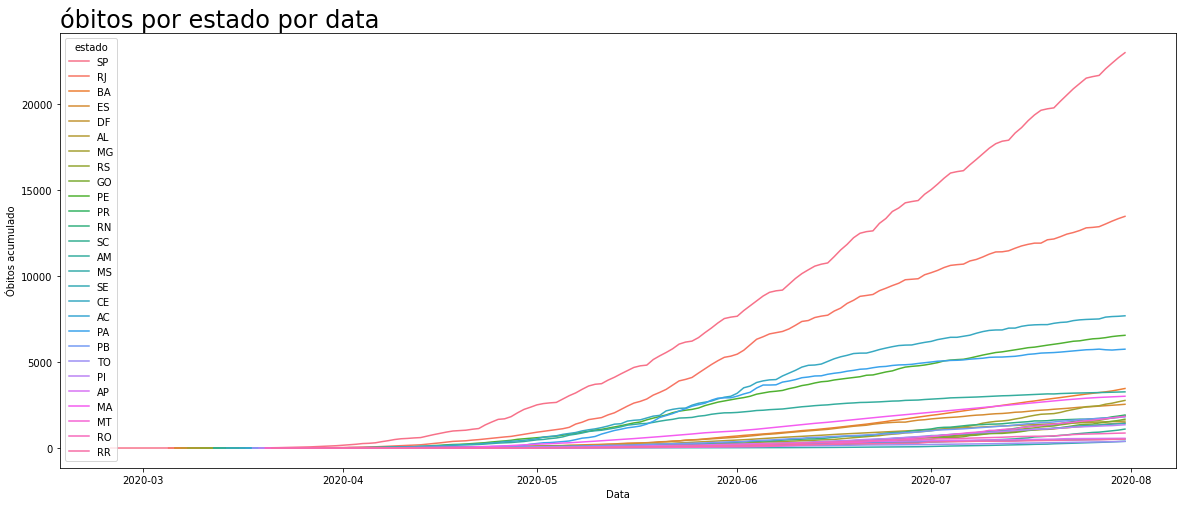

In [32]:
#Plotando o gráfico da quantidade de casos entre os estados
plt.figure(figsize=(20,8))
fig = sns.lineplot(data=df_states, x='data',y='Obitos',hue='estado')
fig.set_title("óbitos por estado por data", loc='left', fontsize=24)
fig.set_ylabel("Óbitos acumulado")
fig.set_xlabel("Data")


In [50]:
#Puxando apenas o estado de SP
df_sp = df_states[df_states['estado'] == 'SP']

#Vendo os dados
df_sp.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN


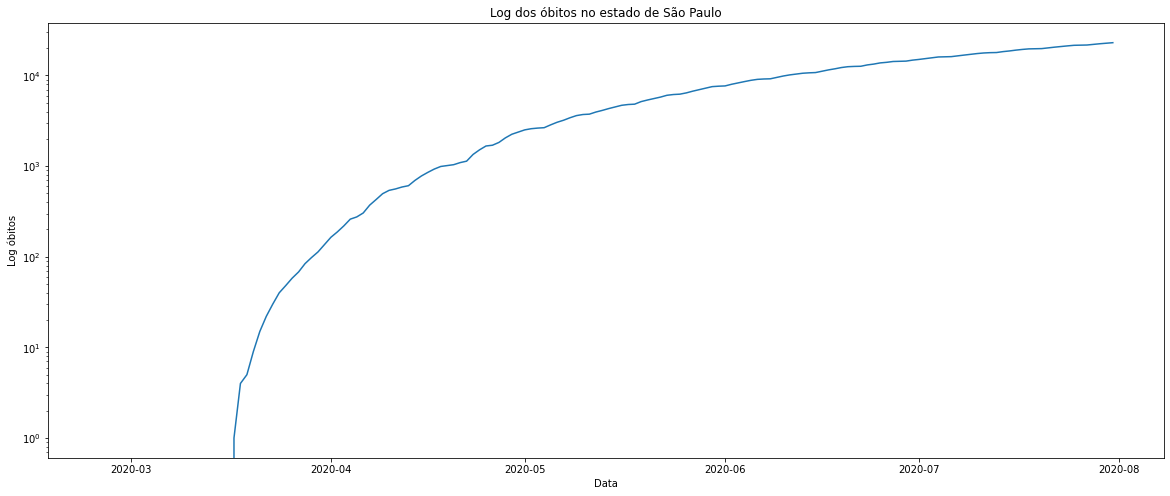

In [33]:
#Vendo se os dados são dados exponenciais aplicando o logarítmo do sns
#Criando a figura
plt.figure(figsize=(20,8))
fig = sns.lineplot(data=df_sp, x='data', y='Obitos')
fig.set_title("Log dos óbitos no estado de São Paulo")
fig.set_xlabel("Data")
fig.set_ylabel("Log óbitos")
fig.set_yscale('log')

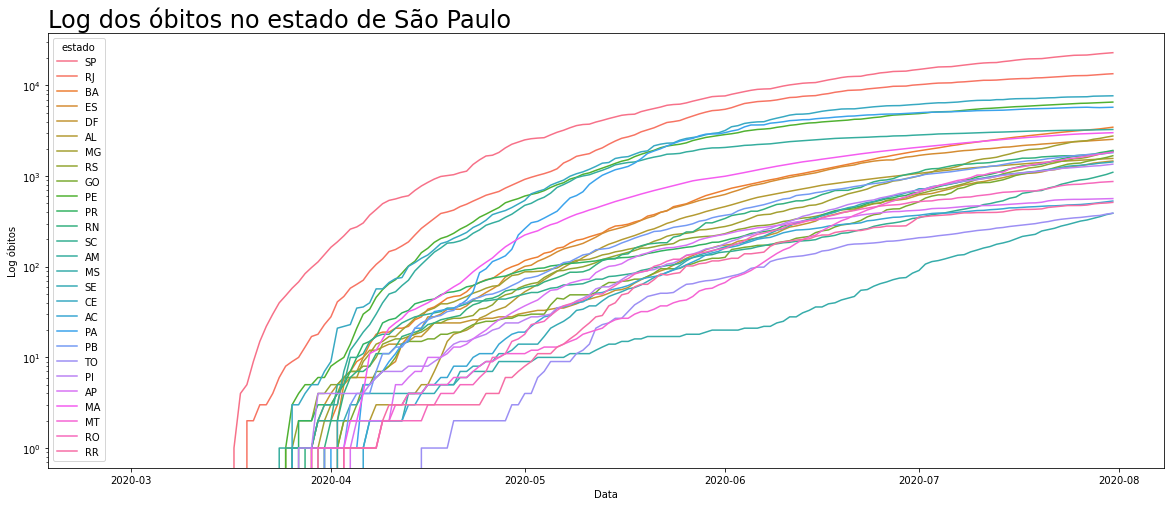

In [36]:
#Aplicando o logaritmo em todos os estados para validar 
plt.figure(figsize=(20,8))
fig = sns.lineplot(data=df_states, x='data', y='Obitos', hue='estado')
fig.set_title("Log dos óbitos no estado de São Paulo", loc='left', fontsize=24)
fig.set_xlabel("Data")
fig.set_ylabel("Log óbitos")
fig.set_yscale('log')

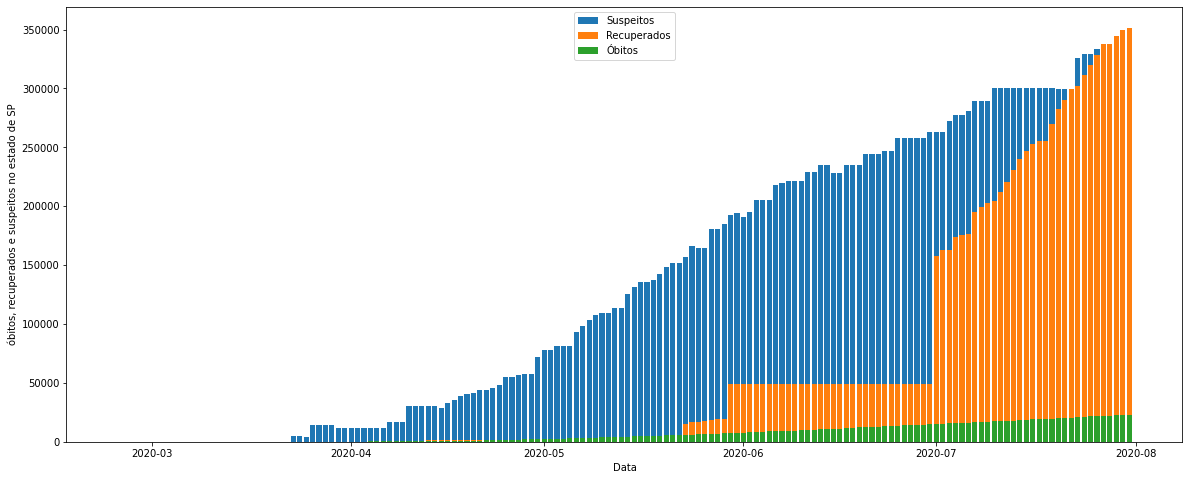

In [40]:
#Analisando os dados de recuperados com os de óbito no estado de SP 
plt.figure(figsize=(20,8))
fig = plt.bar(df_sp['data'], df_sp['suspeitos'], label='Suspeitos')
plt.bar(df_sp['data'], df_sp['recuperados'], label="Recuperados")
plt.bar(df_sp['data'], df_sp['Obitos'], label='Óbitos')
plt.xlabel("Data")
plt.ylabel("óbitos, recuperados e suspeitos no estado de SP", rotation=90)
plt.legend()
plt.show()

In [41]:
#Criando as funções para facilitar a criação de gráfico e a análise exploratória
def plotar_lineplot(titulo, xlabel, ylabel, x,y,dataset,hue):
    fig = sns.lineplot(data=dataset, x=x,y=y,hue=hue)
    fig.figure.set_size_inches(12,6)
    fig.set_title(titulo, loc='left', fontsize=20)
    fig.set_xlabel(xlabel, fontsize=20)
    fig.set_ylabel(ylabel, fontsize=20, rotation=90)

In [42]:
#Criando a função para o gráfico de barras
def plotar_bars(titulo, xlabel, ylabel, x, y, dataset):
    plt.figure(figsize=(20,6))
    ax = plt.bar(dataset[x],dataset[y])
    plt.title(titulo, loc='left', fontsize=20)
    plt.xlabel(xlabel, fontsize=20)
    plt.ylabel(ylabel, fontsize=20, rotation=90)

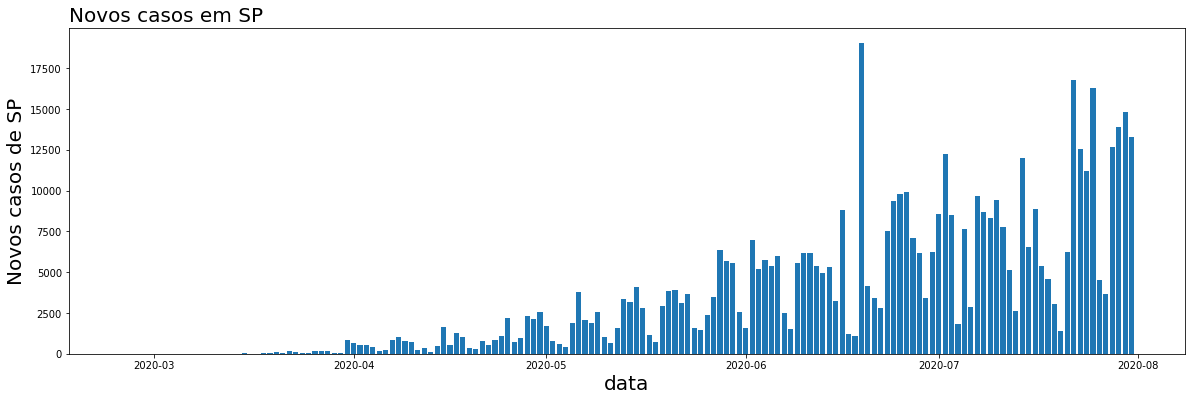

In [43]:
#Usando a função para mostar os novos casos de SP 
plotar_bars('Novos casos em SP', 'data', 'Novos casos de SP','data','novosCasos',df_sp)

In [53]:
#Calculando a acelaração de novos casos e óbitos

#Criando as novas colunas com a função diff 
df_sp['aceleracao_obitos'] = df_sp['novosObitos'].diff()
df_sp['aceleracao_novoscasos'] = df_sp['novosCasos'].diff()

#Verificando a função 
df_sp.head()

C:\Users\pedro\AppData\Local\Temp/ipykernel_25752/1850169522.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sp['aceleracao_obitos'] = df_sp['novosObitos'].diff()
C:\Users\pedro\AppData\Local\Temp/ipykernel_25752/1850169522.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sp['aceleracao_novoscasos'] = df_sp['novosCasos'].diff()


,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k,aceleracao_obitos,aceleracao_novoscasos
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,0.0,-1.0
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,0.0,0.0
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN,0.0,1.0
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN,0.0,-1.0


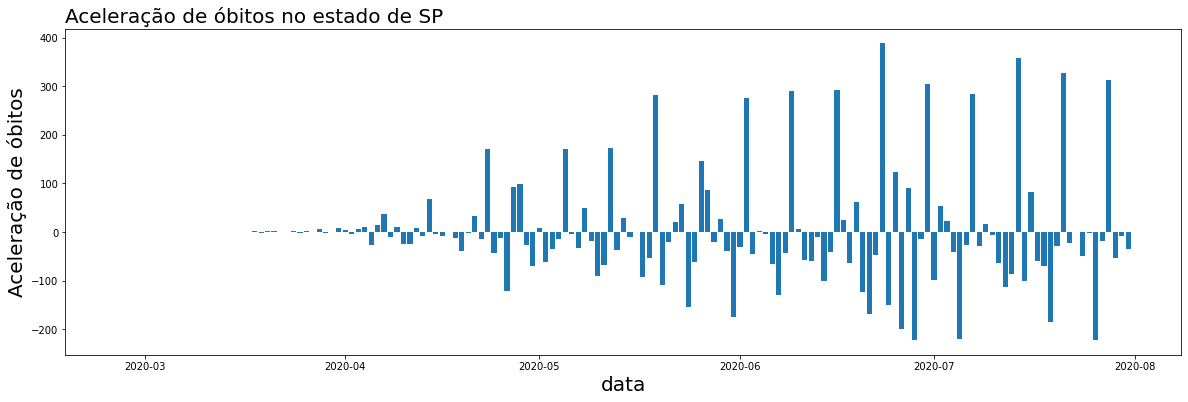

In [54]:
#Plotando o gráfico de barras com a visualização da aceleração dos óbitos
plotar_bars('Aceleração de óbitos no estado de SP','data','Aceleração de óbitos','data','aceleracao_obitos',df_sp)

In [55]:
#Criando as funções de média móvel para conseguir visualizar a aceleração de óbitos 
df_sp['mediaObitos'] = df_sp['novosObitos'].rolling(window=7, center=False).mean()

#Pegando a média de 14 dias pois é o número em que a pessoa fica de quarentena na maioria dos casos
df_sp['mediaObitos_14'] = df_sp['novosObitos'].rolling(window=14, center=False).mean()

C:\Users\pedro\AppData\Local\Temp/ipykernel_25752/2143328706.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sp['mediaObitos'] = df_sp['novosObitos'].rolling(window=7, center=False).mean()
C:\Users\pedro\AppData\Local\Temp/ipykernel_25752/2143328706.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sp['mediaObitos_14'] = df_sp['novosObitos'].rolling(window=14, center=False).mean()


<BarContainer object of 158 artists>

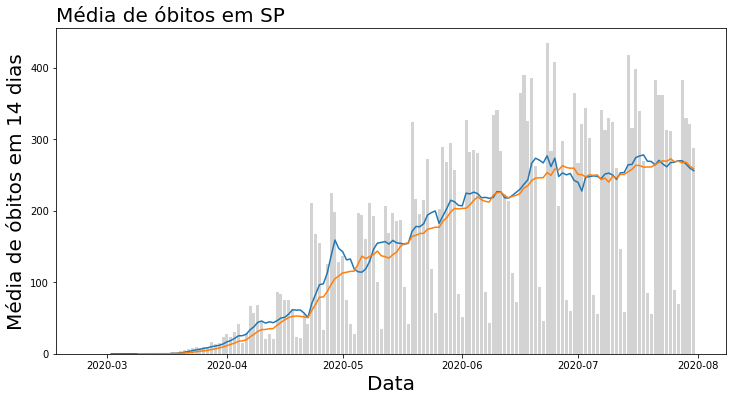

In [60]:
#Plotando a linha média 
plotar_lineplot('Média de óbitos em SP','Data','Média de óbitos em 7 dias','data','mediaObitos',df_sp,None)
plotar_lineplot('Média de óbitos em SP','Data','Média de óbitos em 14 dias','data','mediaObitos_14',df_sp,None)

#Colocando o gráfico de barras para validar 
plt.bar(df_sp['data'], df_sp['novosObitos'], color='lightgrey')

In [61]:
#Verificando a autocorelação nos casos de óbitos 

#Importando o gráfico de autocorelação 
from pandas.plotting import autocorrelation_plot

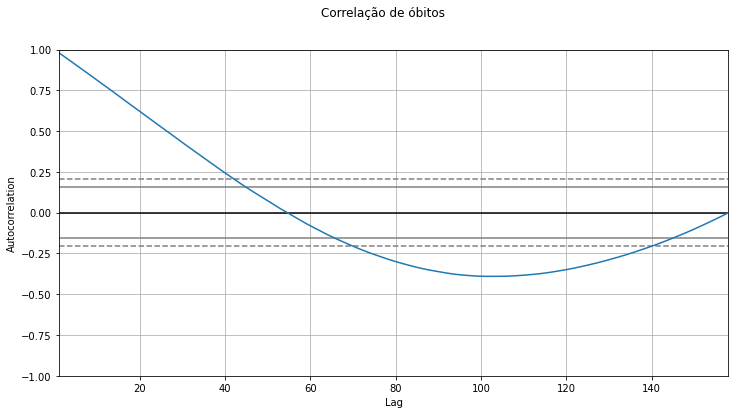

In [63]:
#Fazendo o gráfico com os óbitos
ax = plt.figure(figsize=(12,6))
ax.suptitle("Correlação de óbitos")
autocorrelation_plot(df_sp['Obitos'])
ax=ax

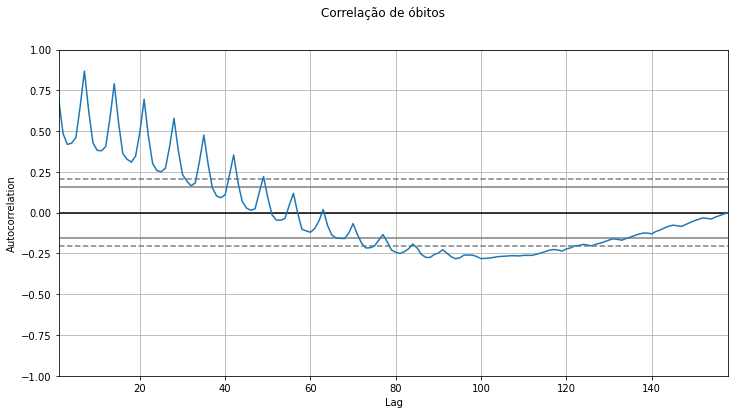

In [64]:
#Vendo a autocorrelação entre os dias para verificar o aumento de lag por semana
ax = plt.figure(figsize=(12,6))
ax.suptitle("Correlação de óbitos")
autocorrelation_plot(df_sp['novosObitos'])
ax=ax

In [71]:
#Verificando a sazonalidade dos dias da semana com o cadastro de óbitos no período
#Pegando o mês 
df_sp['mes'] = pd.to_datetime(df_sp['data'])
df_sp['weekday'] = df_sp['mes'].dt.day_name()

#vendo o df
df_sp.head()

C:\Users\pedro\AppData\Local\Temp/ipykernel_25752/3426484083.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sp['mes'] = pd.to_datetime(df_sp['data'])
C:\Users\pedro\AppData\Local\Temp/ipykernel_25752/3426484083.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sp['weekday'] = df_sp['mes'].dt.day_name()


,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,...,recuperados,suspeitos,testes,testes_por_100k,aceleracao_obitos,aceleracao_novoscasos,mediaObitos,mediaObitos_14,mes,weekday
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-25,Tuesday
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,0.0,-1.0,NaN,NaN,2020-02-26,Wednesday
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,2020-02-27,Thursday
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,...,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,2020-02-28,Friday
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,...,NaN,NaN,NaN,NaN,0.0,-1.0,NaN,NaN,2020-02-29,Saturday


In [75]:
#Criando o groupbay com o dia da semana 
dias_agrupados = df_sp.groupby(['weekday'])['Obitos','novosObitos','aceleracao_obitos'].mean().round()
dias_agrupados['dias_da_semana'] = dias_agrupados.index

#Vendo os dados 
dias_agrupados

C:\Users\pedro\AppData\Local\Temp/ipykernel_25752/2275736343.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dias_agrupados = df_sp.groupby(['weekday'])['Obitos','novosObitos','aceleracao_obitos'].mean().round()


,Obitos,novosObitos,aceleracao_obitos,dias_da_semana
weekday,,,,
Friday,7342.0,177.0,-13.0,Friday
Monday,6887.0,41.0,-20.0,Monday
Saturday,6786.0,155.0,-17.0,Saturday
Sunday,6846.0,60.0,-95.0,Sunday
Thursday,7165.0,190.0,9.0,Thursday
Tuesday,6794.0,206.0,175.0,Tuesday
Wednesday,6975.0,181.0,-25.0,Wednesday


In [77]:
#reorganizando o df agrupado 
dias_agrupados = dias_agrupados.reindex(["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"])

#Vendo os dados
dias_agrupados.head(7)

,Obitos,novosObitos,aceleracao_obitos,dias_da_semana
weekday,,,,
Sunday,6846.0,60.0,-95.0,Sunday
Monday,6887.0,41.0,-20.0,Monday
Tuesday,6794.0,206.0,175.0,Tuesday
Wednesday,6975.0,181.0,-25.0,Wednesday
Thursday,7165.0,190.0,9.0,Thursday
Friday,7342.0,177.0,-13.0,Friday
Saturday,6786.0,155.0,-17.0,Saturday


C:\Users\pedro\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='dias_da_semana', ylabel='novosObitos'>

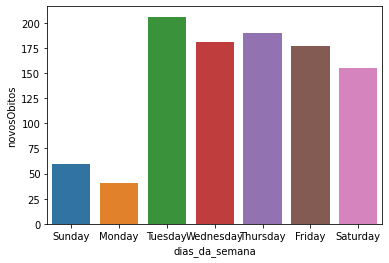

In [78]:
#Plotando os dados 
sns.barplot(dias_agrupados['dias_da_semana'],dias_agrupados['novosObitos'])

In [80]:
#Criando a função para adicionar detalhamento nas datas com o datetime
def create_datetime_features(df, label=None):
    df = df.copy()
    df['Diasemana'] = df['mes'].dt.dayofweek
    df['Mes'] = df['mes'].dt.month
    df['Diames'] = df['mes'].dt.day

    X = df[['Diasemana','Mes','Diames']]

    if label:
        y = df[label]
        return X,y
    return X

In [81]:
#Usando a def para criar a variável 
X,y = create_datetime_features(df_sp,label='Obitos')

df_final_dates = pd.concat([X,y], axis=1)

df_final_dates.head()

,Diasemana,Mes,Diames,Obitos
0,1,2,25,0
2,2,2,26,0
4,3,2,27,0
6,4,2,28,0
8,5,2,29,0


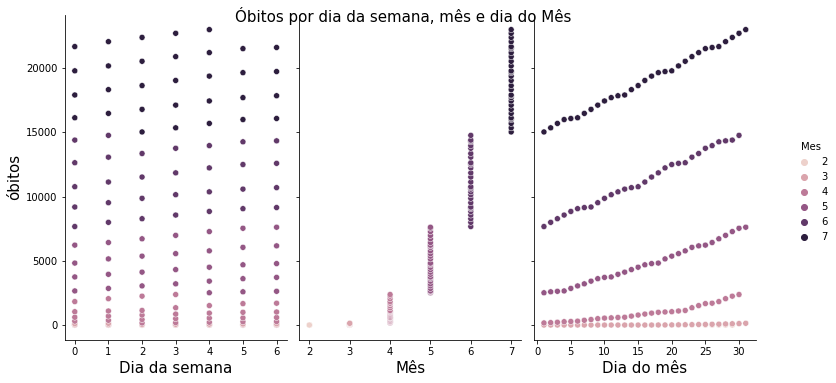

In [84]:
#Plotando as 3 variáveis com o seaborn
figure = sns.pairplot(df_final_dates.dropna(), hue='Mes',x_vars=['Diasemana','Mes','Diames'],y_vars='Obitos')

figure.fig.set_size_inches(12,6)
figure.axes[0,0].set_xlabel("Dia da semana", fontsize=15)
figure.axes[0,1].set_xlabel("Mês", fontsize=15)
figure.axes[0,2].set_xlabel("Dia do mês", fontsize=15)
figure.axes[0,0].set_ylabel("óbitos", fontsize=15)

plt.suptitle("Óbitos por dia da semana, mês e dia do Mês", fontsize=15)
plt.show()